In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Divvy = pd.read_csv(r"C:\Users\Harry\Desktop\2020 Courses\Fall 2020\ISQS 4370 - Data Mining\Final Project\Divvy.csv")

In [3]:
Divvy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388653 entries, 0 to 388652
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             359918 non-null  object 
 1   rideable_type       359918 non-null  object 
 2   started_at          359918 non-null  object 
 3   ended_at            359918 non-null  object 
 4   start_station_name  332941 non-null  object 
 5   start_station_id    332747 non-null  float64
 6   end_station_name    329188 non-null  object 
 7   end_station_id      329048 non-null  float64
 8   start_lat           359918 non-null  float64
 9   start_lng           359918 non-null  float64
 10  end_lat             359918 non-null  float64
 11  end_lng             359918 non-null  float64
 12  member_casual       359918 non-null  object 
 13  miles               359300 non-null  float64
 14  minutes             359918 non-null  float64
dtypes: float64(8), object(7)
memory us

In [4]:
Divvy2 = Divvy.dropna()

In [5]:
DV = Divvy2.corr()
DV.corr()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,miles,minutes
start_station_id,1.000000,0.384864,0.421400,-0.613672,0.373490,-0.514665,-0.014300,-0.176651
end_station_id,0.384864,1.000000,0.380709,-0.522768,0.427499,-0.619907,-0.002016,-0.162551
start_lat,0.421400,0.380709,1.000000,-0.931774,0.981089,-0.904728,0.111463,-0.132469
start_lng,-0.613672,-0.522768,-0.931774,1.000000,-0.906787,0.932831,-0.267614,-0.013620
end_lat,0.373490,0.427499,0.981089,-0.906787,1.000000,-0.931450,0.120829,-0.124613
end_lng,-0.514665,-0.619907,-0.904728,0.932831,-0.931450,1.000000,-0.280331,-0.023874
miles,-0.014300,-0.002016,0.111463,-0.267614,0.120829,-0.280331,1.000000,0.646490
minutes,-0.176651,-0.162551,-0.132469,-0.013620,-0.124613,-0.023874,0.646490,1.000000


In [6]:
DV.dtypes

start_station_id    float64
end_station_id      float64
start_lat           float64
start_lng           float64
end_lat             float64
end_lng             float64
miles               float64
minutes             float64
dtype: object

In [7]:
import statsmodels.api as sm

Y = Divvy2.miles
X = Divvy2[["start_station_id", "end_station_id", "start_lat", "start_lng", 
            "end_lat", "end_lng", "minutes"]]
model = sm.OLS(Y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  miles   R-squared (uncentered):                   0.686
Model:                            OLS   Adj. R-squared (uncentered):              0.685
Method:                 Least Squares   F-statistic:                          9.820e+04
Date:                Fri, 04 Dec 2020   Prob (F-statistic):                        0.00
Time:                        14:19:51   Log-Likelihood:                     -4.6804e+05
No. Observations:              315377   AIC:                                  9.361e+05
Df Residuals:                  315370   BIC:                                  9.362e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
start_station_id     0.0003   1.26e-05     26.137      0.000       0.000       0.000
end_station_id       0.0003   1.26e-05     23.261      0.000       0.000       0.000
start_lat            0.8470      0.093      9.144      0.000       0.665       1.029
start_lng            1.1760      0.110     10.726      0.000       0.961       1.391
end_lat              1.8517      0.093     20.007      0.000       1.670       2.033
end_lng              0.1055      0.110      0.962      0.336      -0.109       0.321
minutes              0.0393      0.000    283.746      0.000       0.039       0.040
==============================================================================
Omnibus:                   300955.394   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1539156179.497
Skew:                          -3.215   Prob(JB):                         0.00
Kurtosis:                     345.181   Cond. No.                     3.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=result.model.exog
vif=[variance_inflation_factor (variables, i ) for i in range(variables.shape[1])]
vif

[3.2413064243884158,
 3.25432805022538,
 4171475.830188373,
 25563229.044612754,
 4164554.9351308383,
 25597836.30496928,
 2.103634634587868]

In [8]:
Y = Divvy2.miles
X = Divvy2[["start_lat", "start_lng", 
            "end_lat", "end_lng"]]
model = sm.OLS(Y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  miles   R-squared (uncentered):                   0.603
Model:                            OLS   Adj. R-squared (uncentered):              0.603
Method:                 Least Squares   F-statistic:                          1.198e+05
Date:                Fri, 04 Dec 2020   Prob (F-statistic):                        0.00
Time:                        14:20:20   Log-Likelihood:                     -5.0474e+05
No. Observations:              315377   AIC:                                  1.009e+06
Df Residuals:                  315373   BIC:                                  1.010e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
start_lat      0.8720      0.104      8.422      0.000       0.669       1.075
start_lng      1.4526      0.121     12.010      0.000       1.216       1.690
end_lat        2.4861      0.103     24.040      0.000       2.283       2.689
end_lng        0.1362      0.121      1.125      0.261      -0.101       0.373
==============================================================================
Omnibus:                   139779.135   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           860429.377
Skew:                           2.058   Prob(JB):                         0.00
Kurtosis:                       9.967   Cond. No.                     1.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
from sklearn.tree import export_graphviz

In [18]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [14]:
Divvy2.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,miles,minutes
0,ACB6B40CF5B9044C,electric_bike,10/31/2020 19:39,10/31/2020 19:57,Lakeview Ave & Fullerton Pkwy,313.0,Rush St & Hubbard St,125.0,41.926101,-87.638977,41.890345,-87.626068,casual,2.559,17.0
1,DF450C72FD109C01,electric_bike,10/31/2020 23:50,11/1/2020 0:04,Southport Ave & Waveland Ave,227.0,Kedzie Ave & Milwaukee Ave,260.0,41.948172,-87.663911,41.929528,-87.707818,casual,2.599,14.0
2,B6396B54A15AC0DF,electric_bike,10/31/2020 23:00,10/31/2020 23:08,Stony Island Ave & 67th St,102.0,University Ave & 57th St,423.0,41.773462,-87.585372,41.791455,-87.600050,casual,1.455,8.0
3,44A4AEE261B9E854,electric_bike,10/31/2020 22:16,10/31/2020 22:19,Clark St & Grace St,165.0,Broadway & Sheridan Rd,256.0,41.950855,-87.659244,41.952809,-87.650103,casual,0.489,2.0
4,10B7DD76A6A2EB95,electric_bike,10/31/2020 19:38,10/31/2020 19:54,Southport Ave & Wrightwood Ave,190.0,Stave St & Armitage Ave,185.0,41.928857,-87.663962,41.917777,-87.691434,casual,1.607,16.0
5,DA6C3759660133DA,electric_bike,10/29/2020 17:38,10/29/2020 17:45,Larrabee St & Division St,359.0,Wells St & Huron St,53.0,41.903532,-87.643345,41.894397,-87.634312,casual,0.784,7.0
6,C2F3808FD56B4F84,electric_bike,10/29/2020 9:03,10/29/2020 9:17,Lakeview Ave & Fullerton Pkwy,313.0,Rush St & Hubbard St,125.0,41.925841,-87.639042,41.890470,-87.625896,casual,2.536,14.0
7,15B13B5A508BA2B6,electric_bike,10/29/2020 16:37,10/29/2020 16:52,Rush St & Hubbard St,125.0,Lakeview Ave & Fullerton Pkwy,313.0,41.890310,-87.626259,41.925743,-87.638908,casual,2.534,15.0
9,E1FB79FFE6DB0117,electric_bike,10/29/2020 16:38,10/29/2020 16:50,Canal St & Madison St,174.0,Fairbanks St & Superior St,635.0,41.882372,-87.639551,41.895310,-87.620319,casual,1.334,11.0
10,093E42D6AF01E682,electric_bike,10/28/2020 21:11,10/28/2020 21:14,Sheffield Ave & Waveland Ave,114.0,Broadway & Cornelia Ave,303.0,41.949219,-87.654530,41.945610,-87.646270,casual,0.492,3.0


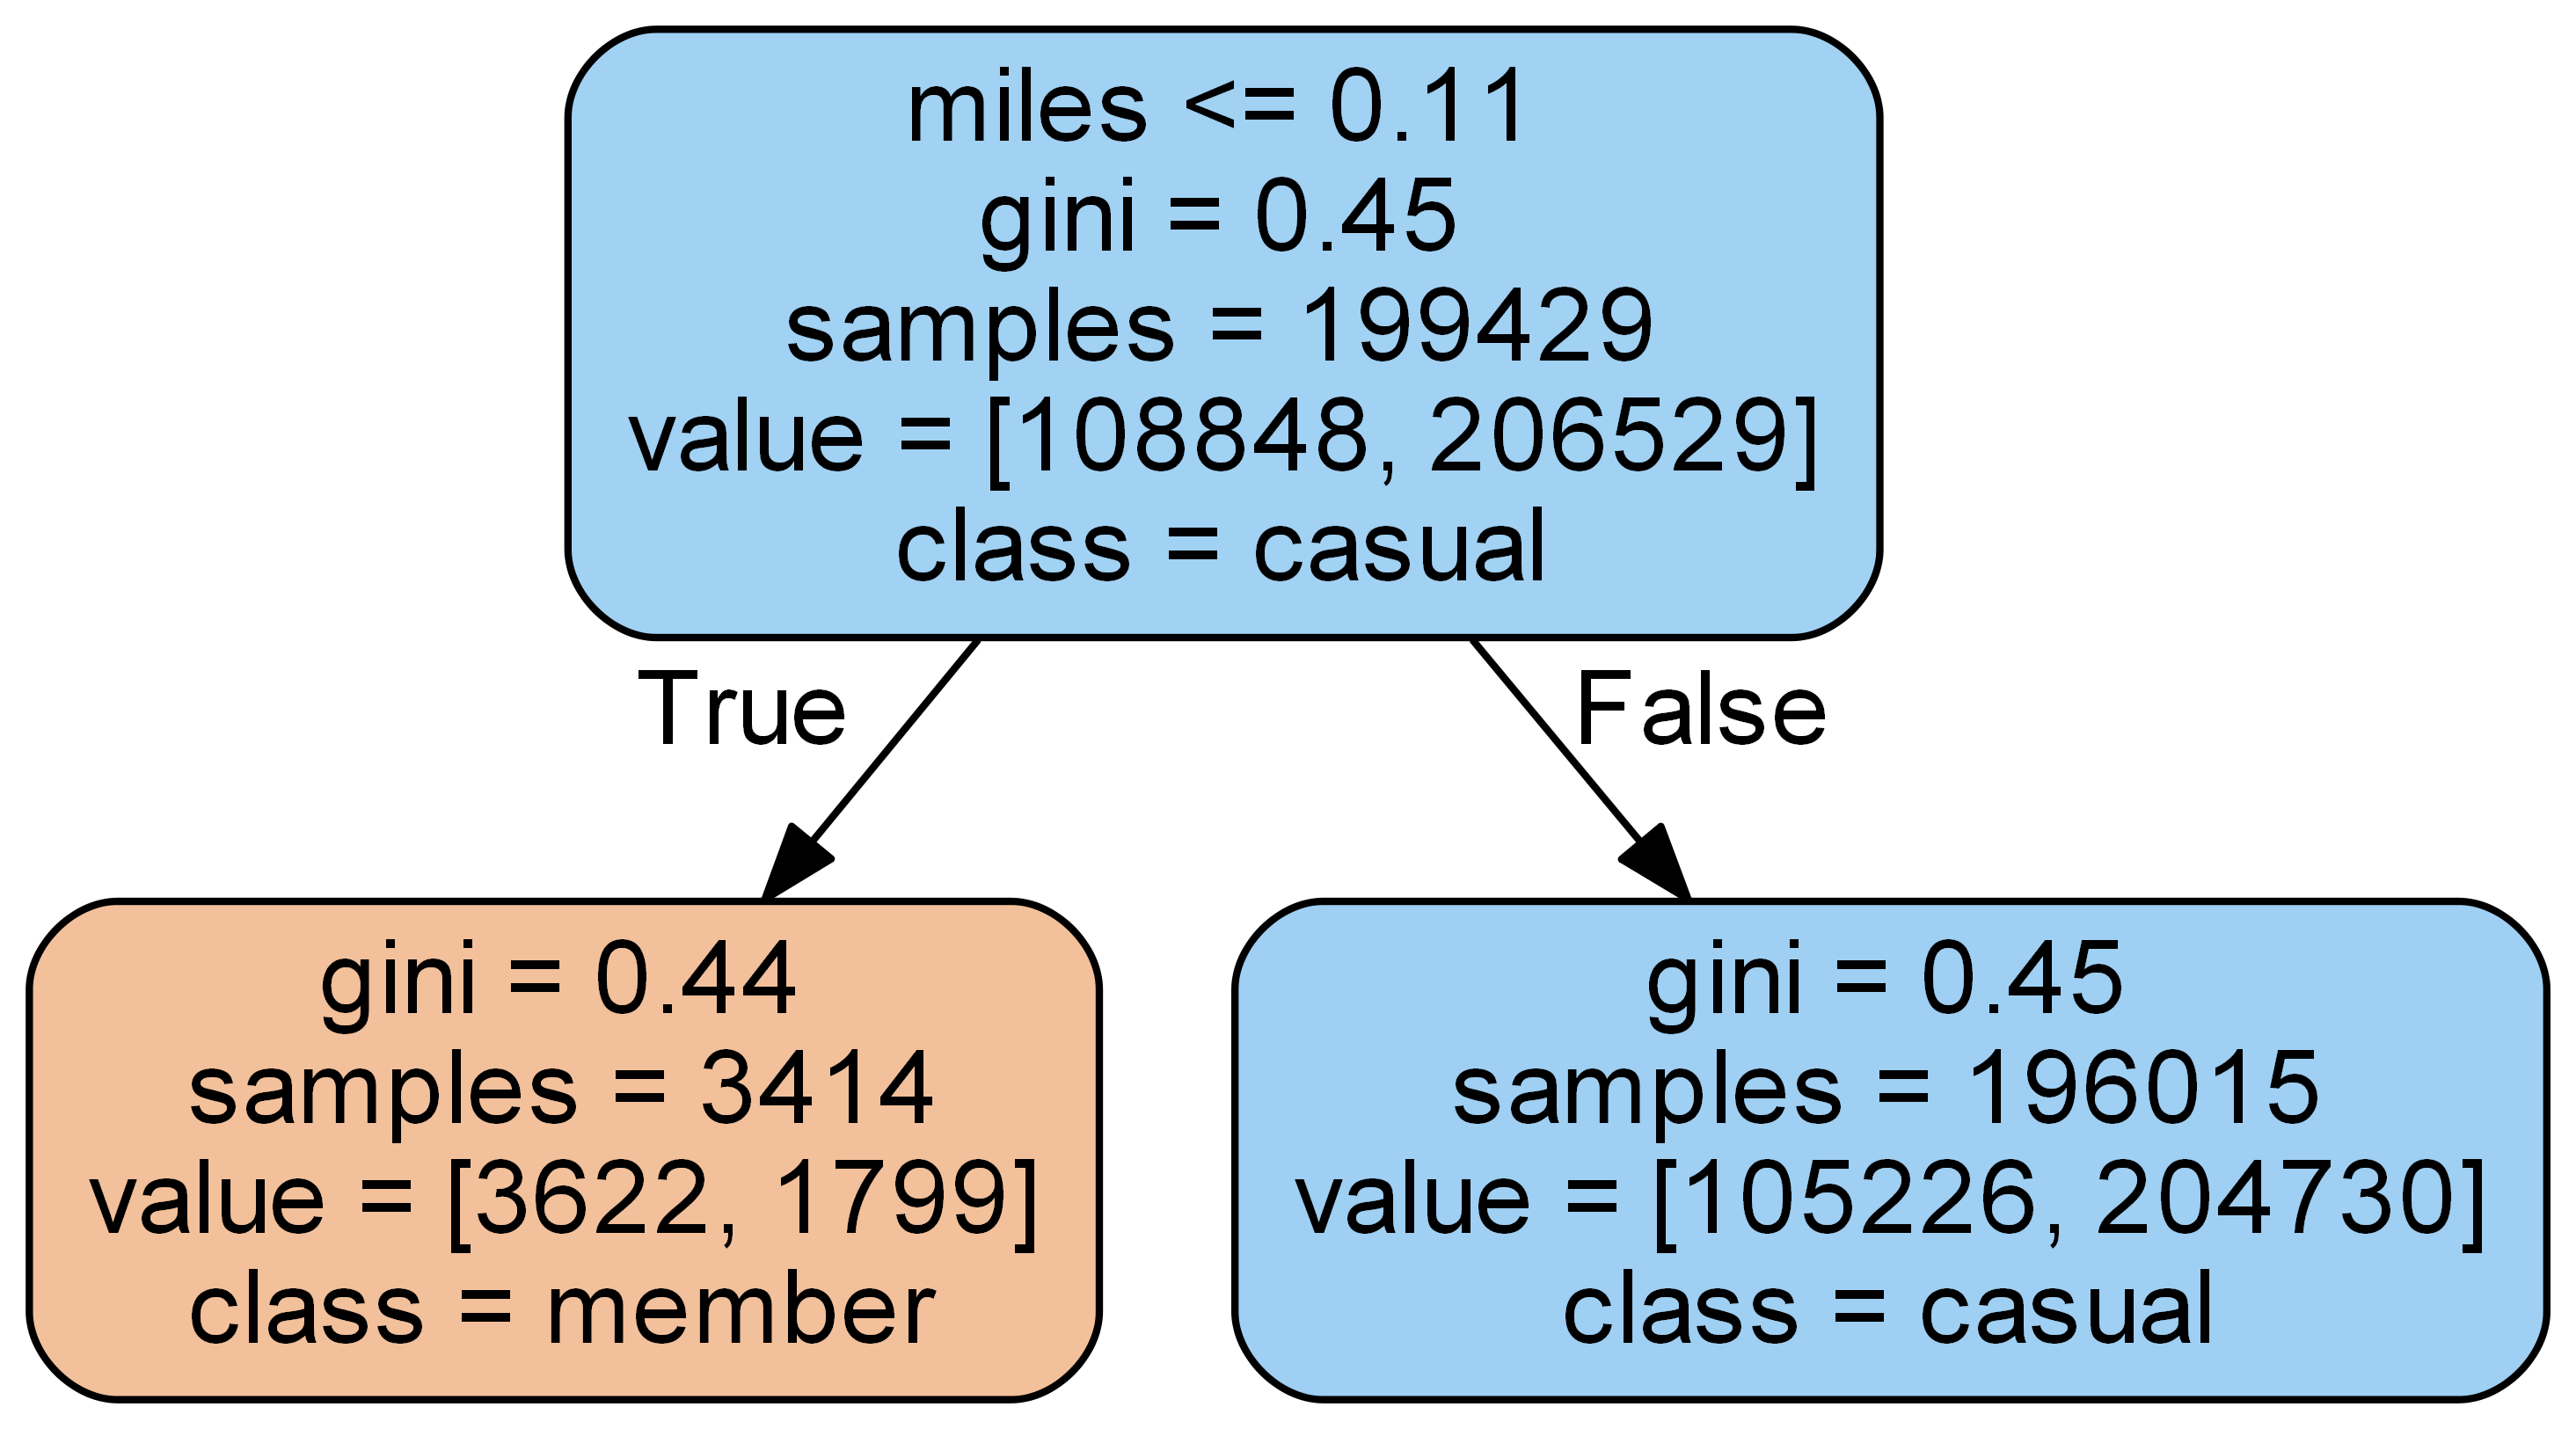

In [27]:
#In the diagram presented below
tree1 = RandomForestClassifier(max_depth = 1, n_estimators = 10)
tree1.fit(Divvy2[['start_lat', 'end_lat', 'start_lng', 'end_lng', 'miles']],Divvy2.member_casual)
pred1 = tree1.estimators_[5]
export_graphviz(pred1, out_file='tree1.dot', feature_names = ['start_lat', 'end_lat', 'start_lng', 'end_lng', 'miles'],
                class_names = ['member','casual'], rounded = True, proportion = False, precision = 2,
               filled = True)
!dot -Tpng tree1.dot -o tree1.png -Gdpi=600
from IPython.display import Image
Image(filename = 'tree1.png')

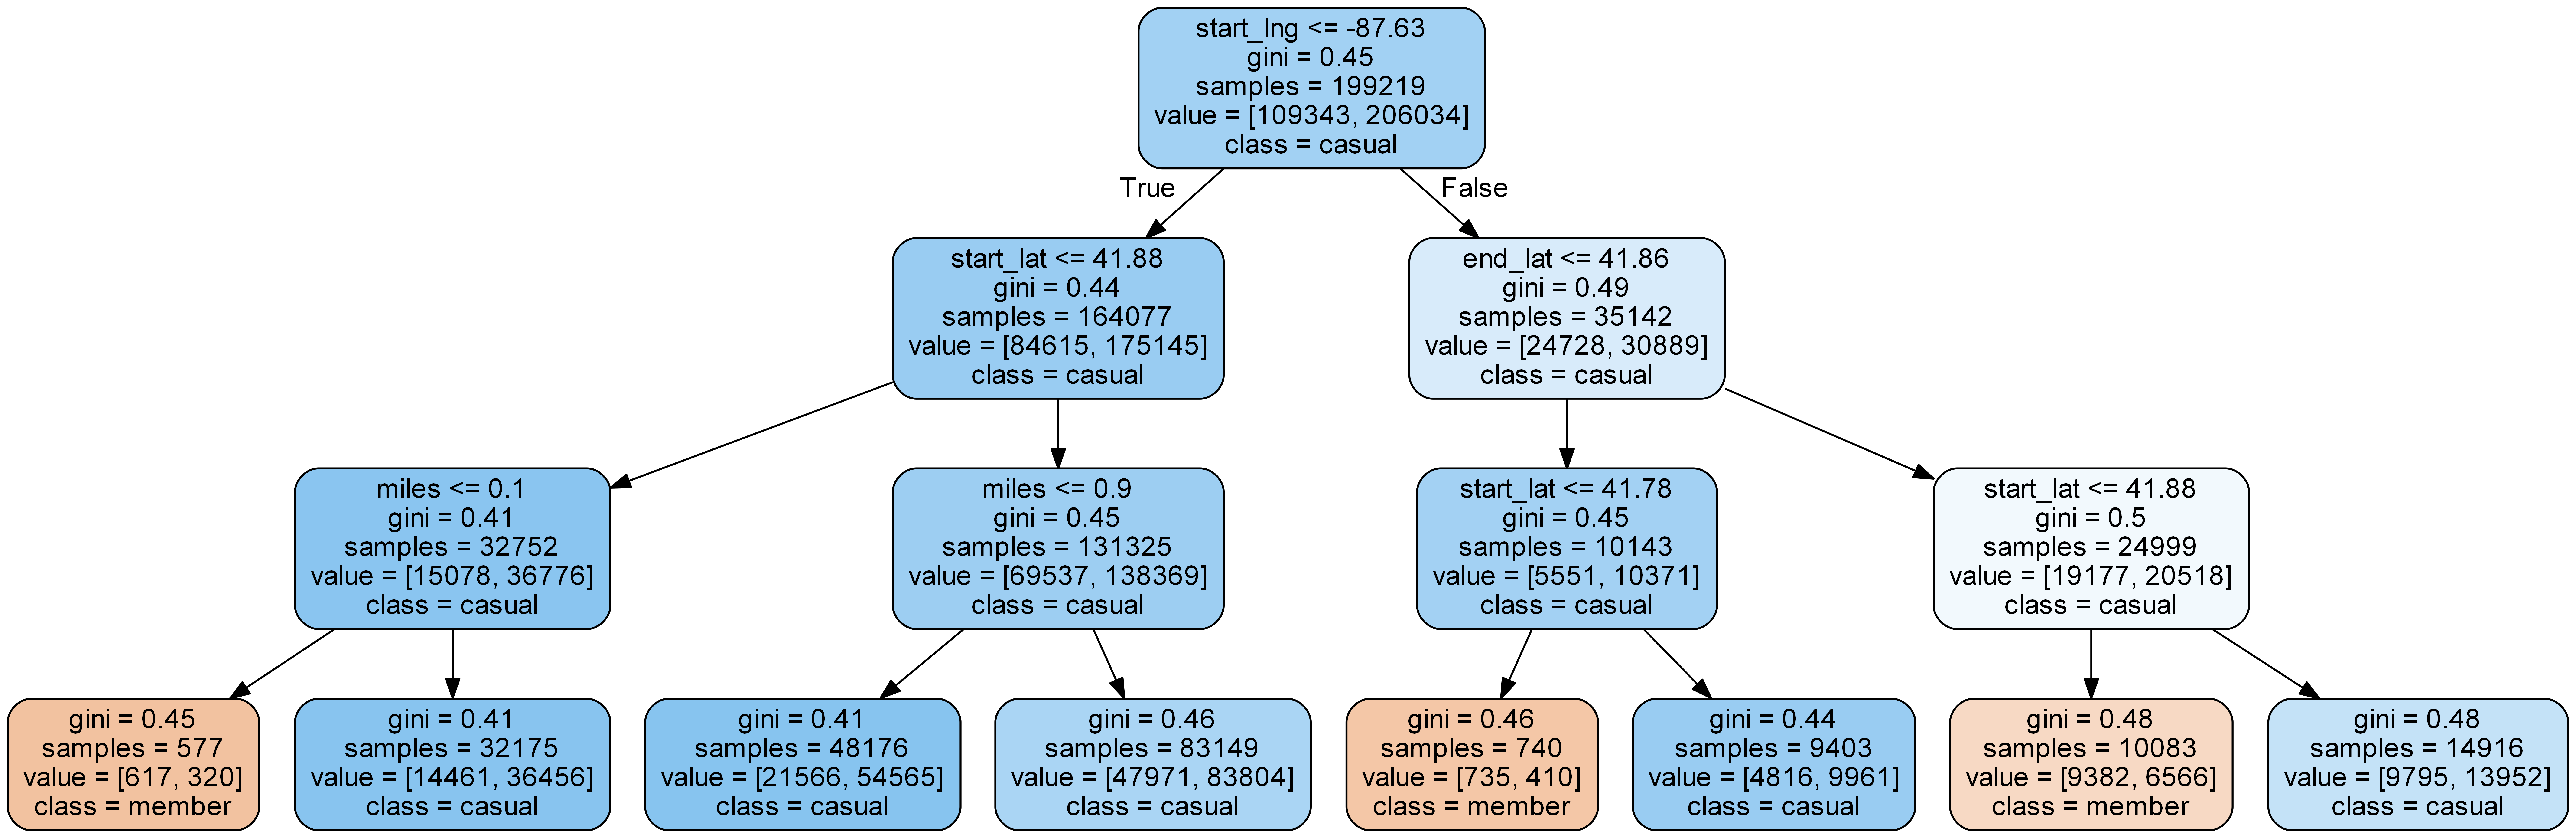

In [28]:
#In the diagram presented below
tree1 = RandomForestClassifier(max_depth = 3, n_estimators = 10)
tree1.fit(Divvy2[['start_lat', 'end_lat', 'start_lng', 'end_lng', 'miles']],Divvy2.member_casual)
pred1 = tree1.estimators_[5]
export_graphviz(pred1, out_file='tree1.dot', feature_names = ['start_lat', 'end_lat', 'start_lng', 'end_lng', 'miles'],
                class_names = ['member','casual'], rounded = True, proportion = False, precision = 2,
               filled = True)
!dot -Tpng tree1.dot -o tree1.png -Gdpi=600
from IPython.display import Image
Image(filename = 'tree1.png')